# 準備

## デフォルトインポート

In [4]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings('ignore')

%matplotlib inline

## このファイルの目的と備考
- 機械学習におけるデータの種類  
  - 予測対象⇒目的変数  
  - 使えるデータ⇒説明変数

- 単回帰問題＝一つの説明変数から目的変数を予測する事  
ここでは`RM(部屋数)⇒MEDV(部屋料金の中央値)`を予測する

## データの準備

In [7]:
from sklearn.datasets import load_boston

boston = load_boston()

In [8]:
# sklearnの変数名の方式に合わせておく(X:説明変数 y:目的変数)
X = boston.data
y = boston.target

In [10]:
# 使いやすくするためにDFに変換
df = pd.DataFrame(X, columns=boston.feature_names) # 説明変数に対してデータフレームを作成
df['MEDV'] = y # 目的変数をデータフレームに追加

df = df[['RM', 'MEDV']] # 単回帰なのでRM(部屋数)と部屋料金(MEDV)だけ抽出

df.head()

,RM,MEDV
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


### RMとMEDVの関係性を観察する

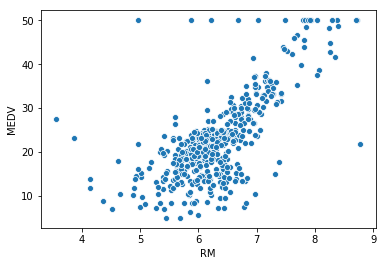

In [11]:
sns.scatterplot(df['RM'], df['MEDV'])

# sns.scatterplot('RM', 'MEDV', data=df) # こっちでもOK

- 所感
  - 部屋数が多いほど部屋料金が高いことがなんとなくわかる
  - 少しばらつきが大きいかな。。。
  
- 予想

$$y = ax + b $$
$$y = ax^2 + bx + c $$

説明変数Xと目的変数yを用いて未知パラメータを求める ＝ 学習  

上式を採用する場合は、つまり今回の問題は以下の式を予測することになる

$$ \hat{y}_i = ax_i + b$$

^は統計の世界では予測値のことを示す。

## 最小二乗法

ここでポピュラーな方法としては最小二乗法を用いる

最小二乗法は`二乗和誤差`が最小になることが正義！！と主張する手法

ダメさ度合いを`二乗和誤差`と定義して最小化するように計算していく。  
二乗和誤差とはデータの点から直線におろした垂線の長さの事。

この時のダメさ度合いのことを`損失関数`と言う。

二乗和誤差 ⇒｛最適化アルゴリズム｝⇒ 最小化  
というように計算していく

## 予測モデルの構築

### モデルの構築

最小二乗法を用いてモデルを構築するときはsklearn.linear_model.LinearRegression()を使用する

In [24]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

# 学習(=未知パラメータの最適化)
linear_regression.fit(df[['RM']], y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### 結果の確認

In [25]:
# 切片
b = linear_regression.intercept_

# 回帰係数
a = linear_regression.coef_[0]

print(f'MEDV = {a:.2f} RM + {b:.2f}')

MEDV = 9.10 RM + -34.67


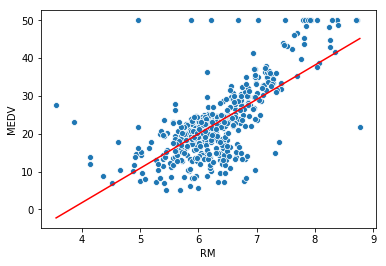

In [28]:
# データの散布図を描画
sns.scatterplot(df['RM'], df['MEDV'])

# 予測の直線を描画
x_line = np.arange(df['RM'].min(),
                   df['RM'].max(),
                   step=0.01)

# 予測値の計算
y_pred = linear_regression.predict(x_line.reshape(-1, 1))

# 直線の描画
plt.plot(x_line, y_pred, c='r')


このように実装は簡単！！だから結局何なのかという話とかその結果が何を示しているかを考えるスキルが重要！！

### 学習に大事なこと

未知のデータをどれだけ正しく予測できるか？(汎化性能)
- 善し悪しの基準(評価指標：Metrics)  
- どうやって測るか(評価プロトコル)

#### 善し悪しの基準(評価指標:Metrics)

予測に使ったデータ以外で、データを代入してみて絶対誤差、二乗誤差、決定係数(寄与率) etc..を求める。

この善し悪しの基準はどのデータを扱うかによって考える必要がある  
(ex) がんの検出

#### どうやって測るか(評価プロトコル)

作成したモデルに対して、未知のデータを入れて予測することで汎化性能を評価する。

サンプルデータの内一部を未知データとして残しておいて、残りデータでモデルを作成した上で、未知データを使って予測を試してみる！

これで、汎化性能を図ることができる！！

In [29]:
linear_regression.score(df[['RM']], y)

0.4835254559913343